In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import re
import matplotlib
matplotlib.font_manager._rebuild()

matplotlib.rc("font",family="SimHei")



In [2]:
df = pd.read_csv('web前端.csv',sep=",")
df.head()

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签
0,开发工程师,上海·浦东新区·张江,阿里云,20-21K·13薪,硕士,在校/应届,互联网
1,操作系统开发工程师（应届）,上海·浦东新区·金桥,华为,20-21K,本科,在校/应届,计算机软件
2,【留学生招聘】5G协议开发工程师-上海,上海·浦东新区·金桥,华为技术有限公司,19-35K,本科,在校/应届,计算机软件
3,研发工程师JAVA,上海·浦东新区·世纪公园,阿里云,15-25K·15薪,硕士,在校/应届,互联网
4,ios开发,上海·浦东新区·张江,兴业数金,12-24K,本科,在校/应届,互联网


In [3]:
offer = df['薪水']

In [4]:
yearOfferMin=pd.Series(dtype=np.float64)
yearOfferMax=pd.Series(dtype=np.float64)
for index,value in offer.items():
    xinshui = re.findall(r'\d+',str(value))
    if(len(xinshui)==3):
        Min = int(xinshui[0])*int(xinshui[2])
        Max = int(xinshui[1])*int(xinshui[2])
        yearOfferMin = yearOfferMin.append(pd.Series(Min))
        yearOfferMax = yearOfferMax.append(pd.Series(Max))
    else:
        Min = int(xinshui[0])*12
        Max = int(xinshui[1])*12
        yearOfferMin = yearOfferMin.append(pd.Series(Min))
        yearOfferMax = yearOfferMax.append(pd.Series(Max))        
#yearOfferMin.index=offer.index
#yearOfferMax.index=offer.index

yearOfferMax.index=offer.index
yearOfferMin.index=offer.index
df['最低年薪'] = yearOfferMin
df['最高年薪'] = yearOfferMax
df

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签,最低年薪,最高年薪
0,开发工程师,上海·浦东新区·张江,阿里云,20-21K·13薪,硕士,在校/应届,互联网,260,273
1,操作系统开发工程师（应届）,上海·浦东新区·金桥,华为,20-21K,本科,在校/应届,计算机软件,240,252
2,【留学生招聘】5G协议开发工程师-上海,上海·浦东新区·金桥,华为技术有限公司,19-35K,本科,在校/应届,计算机软件,228,420
3,研发工程师JAVA,上海·浦东新区·世纪公园,阿里云,15-25K·15薪,硕士,在校/应届,互联网,225,375
4,ios开发,上海·浦东新区·张江,兴业数金,12-24K,本科,在校/应届,互联网,144,288
...,...,...,...,...,...,...,...,...,...
224,运维售后工程师,上海·浦东新区·陆家嘴,日志易,6-9K,本科,在校/应届,计算机软件,72,108
225,系统安全,上海·浦东新区·曹路,上海黎阳信息,10-13K·13薪,本科,在校/应届,信息安全,130,169
226,Junior System Administrator,上海·黄浦区·城隍庙,邻播网络科技,5-10K,本科,在校/应届,计算机服务,60,120
227,初级全栈开发工程师,上海·闵行区·华漕,涵智博雅,7-12K·13薪,本科,在校/应届,环保,91,156


In [5]:
tongfen = [20]

df['最高年薪分段']=pd.qcut(df['最高年薪'],q=10)
df['最低年薪分段']=pd.qcut(df['最低年薪'],q=10)

In [6]:
df

,职位,工作地址,公司全称,薪水,学历,工作经验,行业标签,最低年薪,最高年薪,最高年薪分段,最低年薪分段
0,开发工程师,上海·浦东新区·张江,阿里云,20-21K·13薪,硕士,在校/应届,互联网,260,273,"(252.0, 307.2]","(230.4, 300.0]"
1,操作系统开发工程师（应届）,上海·浦东新区·金桥,华为,20-21K,本科,在校/应届,计算机软件,240,252,"(225.0, 252.0]","(230.4, 300.0]"
2,【留学生招聘】5G协议开发工程师-上海,上海·浦东新区·金桥,华为技术有限公司,19-35K,本科,在校/应届,计算机软件,228,420,"(360.0, 480.0]","(187.2, 230.4]"
3,研发工程师JAVA,上海·浦东新区·世纪公园,阿里云,15-25K·15薪,硕士,在校/应届,互联网,225,375,"(360.0, 480.0]","(187.2, 230.4]"
4,ios开发,上海·浦东新区·张江,兴业数金,12-24K,本科,在校/应届,互联网,144,288,"(252.0, 307.2]","(120.0, 144.0]"
...,...,...,...,...,...,...,...,...,...,...,...
224,运维售后工程师,上海·浦东新区·陆家嘴,日志易,6-9K,本科,在校/应届,计算机软件,72,108,"(104.0, 130.0]","(60.0, 84.0]"
225,系统安全,上海·浦东新区·曹路,上海黎阳信息,10-13K·13薪,本科,在校/应届,信息安全,130,169,"(144.0, 180.0]","(120.0, 144.0]"
226,Junior System Administrator,上海·黄浦区·城隍庙,邻播网络科技,5-10K,本科,在校/应届,计算机服务,60,120,"(104.0, 130.0]","(23.999, 60.0]"
227,初级全栈开发工程师,上海·闵行区·华漕,涵智博雅,7-12K·13薪,本科,在校/应届,环保,91,156,"(144.0, 180.0]","(84.0, 104.0]"


In [7]:
df.to_excel("web前端.xlsx",index=False)

In [8]:
dict={}
for i in pd.qcut(df['最高年薪'],q=10):
    if(not (i in dict.keys())):
        dict[i]=1
    else:
        dict[i]=dict[i]+1
dict2={}

for key,value in dict.items():
    dict2[str(key)]=value

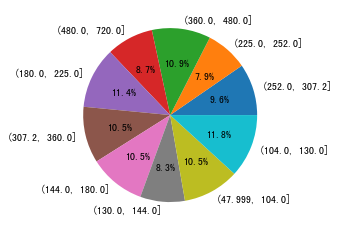

In [9]:
labels = dict2.keys()
pyplot.pie(dict2.values(),labels=labels,autopct='%.1f%%')
pyplot.show()

In [10]:
dict={}
for i in pd.qcut(df['最低年薪'],q=10):
    if(not (i in dict.keys())):
        dict[i]=1
    else:
        dict[i]=dict[i]+1
dict2={}

for key,value in dict.items():
    dict2[str(key)]=value

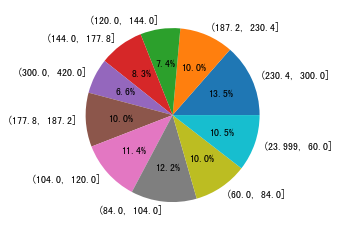

In [11]:
labels = dict2.keys()
pyplot.pie(dict2.values(),labels=labels,autopct='%.1f%%')
pyplot.show()

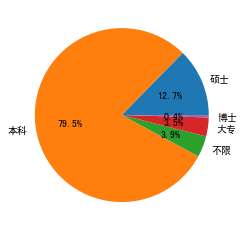

In [12]:
dict={}
for i in df['学历']:
    if not (i in dict.keys()):
        dict[i]=1
    else:
        dict[i]+=1
pyplot.pie(dict.values(),labels=dict.keys(),autopct='%.1f%%')
pyplot.show()

In [13]:
print("最低年薪最高:"+str(df['最低年薪'].max())+"         "+"最低年薪最低:"+str(df['最低年薪'].min())+"      "+"最低年薪中位数:"+str(df['最低年薪'].median())+"      "+"最低年薪众数:"+str(df['最低年薪'].mode())+"      "+"最低年薪均值:"+str(df['最低年薪'].mean()))

最低年薪最高:420         最低年薪最低:24      最低年薪中位数:144.0      最低年薪众数:0    180
dtype: int64      最低年薪均值:160.2882096069869


In [14]:
print("最高年薪最高:"+str(df['最高年薪'].max())+"         "+"最高年薪最低:"+str(df['最高年薪'].min())+"      "+"最高年薪中位数:"+str(df['最高年薪'].median())+"      "+"最高年薪众数:"+str(df['最高年薪'].mode())+"      "+"最高年薪均值:"+str(df['最高年薪'].mean()))

最高年薪最高:720         最高年薪最低:48      最高年薪中位数:225.0      最高年薪众数:0    360
dtype: int64      最高年薪均值:255.8995633187773
